## $\mathbf{E}\times \mathbf{B}$ Drift

2D simulations of Single Particle Drifts

---


#### About the simulation


We will be using the 2D version of **ZPIC**. With this particle in cell code we are required to initialize a full plasma instead of a single particle. However, we may still track single particles and eliminate collective effects by decreasing the plasma density.


#### About the phenomenon


$\mathbf{E}\times \mathbf{B}$ drift happens when the cyclotron motion is combined with the acceleration coming from an electric field.

The change in the cyclotron radius imposed by the acceleration (remember that $r_{cycl}=v_\perp/\omega_c$) leads to a net displacement in the direction of $\mathbf{E}\times \mathbf{B}$


#### The simulation


In [79]:
# Add zpic library to path
import sys

sys.path.append("../../lib")

# get ZPIC 2D
import em2d as zpic
import numpy as np

# Time step
dt = 0.01

# Simulation time
tmax = 22.8

# Number of cells
nx = [64, 64]

# Simulation box size
box = [6, 6]


## Plasma slabs
# Particles per cell
ppc = [4, 4]


def custom_n0(x):
    if x > 1.2 and x < 1.4:
        return 1.0
    else:
        return 0.0


# Use a custom density profile
dens = zpic.Density(type="custom", custom_x=custom_n0, custom_y=custom_n0)
# Set up a super low density
dens.n = 1e-6
# give it a small velocity to kick off the motion
ufl = 0.1
# create the species
electrons = zpic.Species("electrons", m_q=-1, ppc=ppc, density=dens, ufl=[ufl, 0, 0])

## Positive charge
dens2 = zpic.Density(type="custom", custom_x=custom_n0, custom_y=custom_n0)
dens2.n = 1e-6
positives = zpic.Species("positrons", m_q=2, ppc=ppc, density=dens2, ufl=[ufl, 0, 0])


# Initialize simulation
sim = zpic.Simulation(nx, box, dt, species=(electrons, positives))

# Set the sorting period to 0 in order to track the particle's trajectories
# (this must be done after initilializng the simulation object)
positives.n_sort = 0
electrons.n_sort = 0

# Setup the external fields (Remenber that they must be perpendicular)
B = [0, 0, 1]
E = [0, 0.01, 0]


ext = zpic.ExternalField(B_type="uniform", B_0=B, E_type="uniform", E_0=E)

sim.emf.set_ext_fld(ext)


# arays to store the particles trajectories
pos_part_rep = []
ele_part_rep = []


while sim.t < 16 * np.pi:
    print("n = {:d}, t = {:g}".format(sim.n, sim.t), end="\r")
    # store the electron trajectories
    ele_part_rep.append(electrons.particles[40].copy())
    # store the positron(ish) trajectories
    pos_part_rep.append(positives.particles[40].copy())

    sim.iter()


In [80]:
# convert trajectories to position arrays
e_posx_t = [(i["ix"] + i["x"]) * box[0] / nx[0] for i in ele_part_rep]
e_posy_t = [(i["iy"] + i["y"]) * box[1] / nx[1] for i in ele_part_rep]

p_posx_t = [(i["ix"] + i["x"]) * box[0] / nx[0] for i in pos_part_rep]
p_posy_t = [(i["iy"] + i["y"]) * box[1] / nx[1] for i in pos_part_rep]

# create time array
t = np.linspace(0, sim.t, sim.n)


In [82]:
e_vx_t = [(i["ux"]) for i in ele_part_rep]
e_vy_t = [(i["uy"]) for i in ele_part_rep]


p_vx_t = [(i["ux"]) for i in pos_part_rep]
p_vy_t = [(i["uy"]) for i in pos_part_rep]


Run the next cell to plot the trajectory of the electron under the influence of these fields


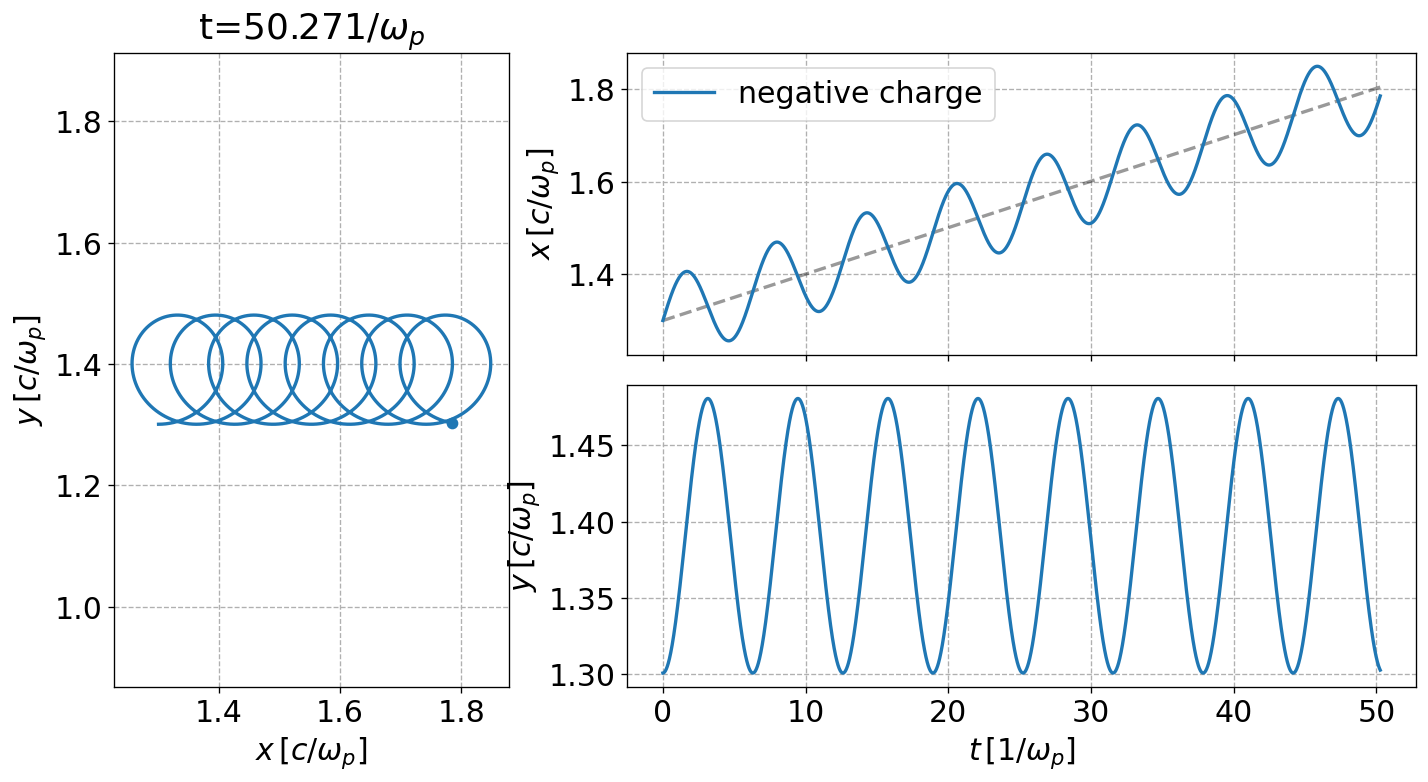

In [83]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec

# Set up the plot
fig = plt.figure(figsize=(14, 7), dpi=120)
plt.rcParams.update({"font.size": 18})
gs2 = gridspec.GridSpec(2, 2, hspace=0.1, width_ratios=[1, 2])

# left part: xy trajectories
ax = plt.subplot(gs2[:, 0])
## negative charge trajectory
ax.plot(e_posx_t, e_posy_t, lw=2)
ax.scatter(e_posx_t[-1], e_posy_t[-1])

# top right: xt trajectories
ax2 = plt.subplot(gs2[0, 1])
ax2.plot(
    t,
    E[1] / B[2] * t + (p_posx_t[0] + e_posx_t[0]) / 2,
    lw=2,
    c="k",
    ls="--",
    alpha=0.4,
)
ax2.plot(t, e_posx_t, lw=2, label="negative charge")

# bottom right: yt trajectories
ax3 = plt.subplot(gs2[1, 1])
ax3.plot(t, e_posy_t, lw=2)

##setup labels, grids, and others
ax.grid(True, ls="--")
ax.set_xlabel("$x\,[c/\omega_p]$")
ax.set_ylabel("$y\,[c/\omega_p]$")
ax.set_aspect("equal", "datalim")
ax.set_title("t={:.2f}$1/\omega_p$".format(sim.t))

ax2.set_xticklabels([])
ax2.grid(True, ls="--")
ax2.set_ylabel("$x\,[c/\omega_p]$")
ax2.legend()

ax3.set_ylabel("$y\,[c/\omega_p]$")
ax3.set_xlabel("$t\,[1/\omega_p]$")
ax3.grid(True, ls="--")

plt.show()


**Q:** In which direction does the particle drift? How does it compare to the fields directions?

---

_anwser_

---


Run the next cell to plot the trajectory of the electron under the influence of these fields together with the positive charge


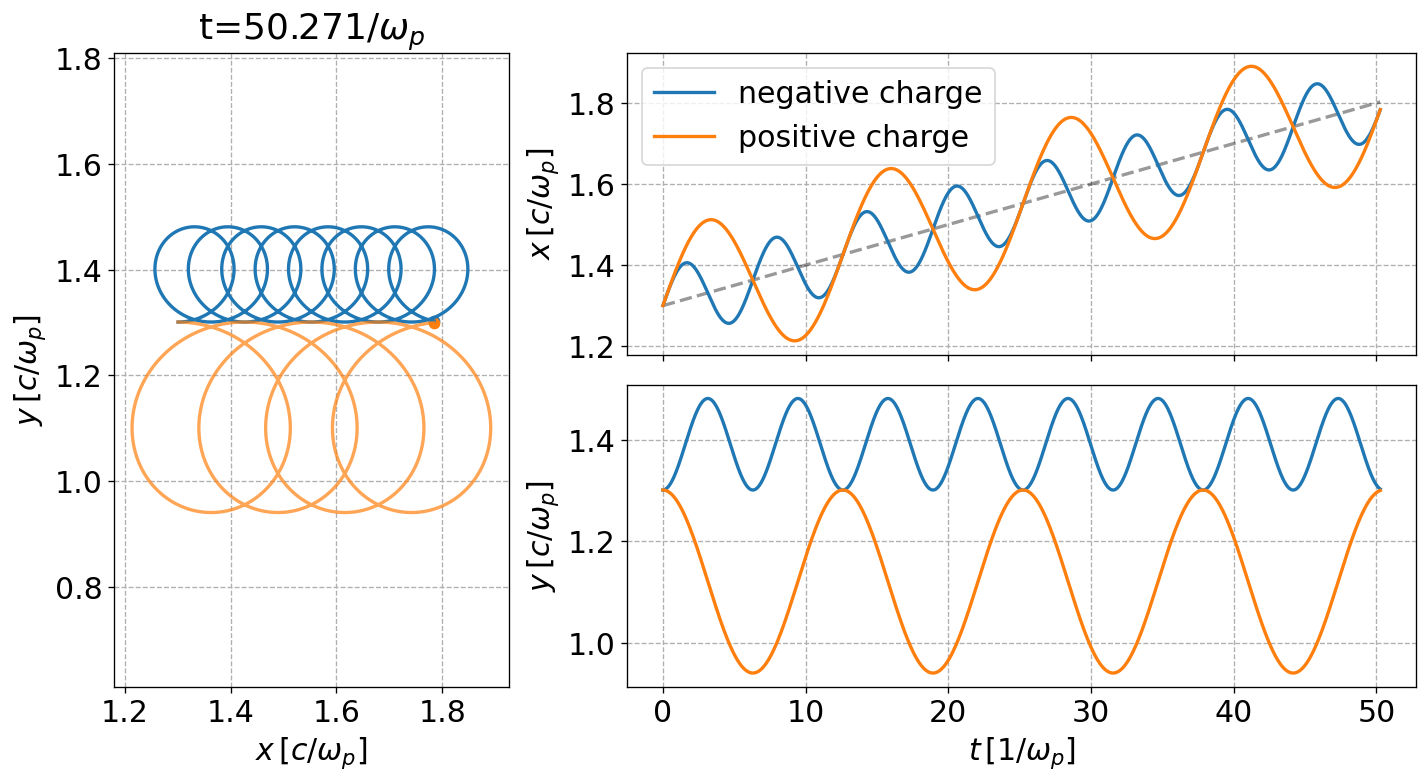

In [84]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec

# Set up the plot
fig = plt.figure(figsize=(14, 7), dpi=120)
plt.rcParams.update({"font.size": 18})
gs2 = gridspec.GridSpec(2, 2, hspace=0.1, width_ratios=[1, 2])

# left part: xy trajectories
ax = plt.subplot(gs2[:, 0])
## negative charge trajectory
ax.plot(e_posx_t, e_posy_t, lw=2)
ax.scatter(e_posx_t[-1], e_posy_t[-1])
## positive charge trajectory
ax.plot(p_posx_t, p_posy_t, lw=2, alpha=0.7)
ax.scatter(p_posx_t[-1], p_posy_t[-1])

# top right: xt trajectories
ax2 = plt.subplot(gs2[0, 1])
ax2.plot(
    t,
    E[1] / B[2] * t + (p_posx_t[0] + e_posx_t[0]) / 2,
    lw=2,
    c="k",
    ls="--",
    alpha=0.4,
)
ax2.plot(t, e_posx_t, lw=2, label="negative charge")
ax2.plot(t, p_posx_t, lw=2, label="positive charge")

# bottom right: yt trajectories
ax3 = plt.subplot(gs2[1, 1])
ax3.plot(t, e_posy_t, lw=2)
ax3.plot(t, p_posy_t, lw=2)

##setup labels, grids, and others
ax.grid(True, ls="--")
ax.set_xlabel("$x\,[c/\omega_p]$")
ax.set_ylabel("$y\,[c/\omega_p]$")
ax.set_aspect("equal", "datalim")
ax.set_title("t={:.2f}$1/\omega_p$".format(sim.t))

ax2.set_xticklabels([])
ax2.grid(True, ls="--")
ax2.set_ylabel("$x\,[c/\omega_p]$")
ax2.legend()

ax3.set_ylabel("$y\,[c/\omega_p]$")
ax3.set_xlabel("$t\,[1/\omega_p]$")
ax3.grid(True, ls="--")
plt.show()


##### Questions

- Comment on the direction of the drift of both particles

---

---

- Comment on the amplitude and frequency of both trajectories. _Hint: take a look at the simulation parameters_

---

---


---
---
